In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import dynamics.motor_analysis as analysis
import layout.motor_tools as tools
import gdspy
import numpy as np
import generator

In [3]:
params = {
    'L_overlap': 20e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':5.5,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 80,
    'shuttle_extension': 50e-6,
    'shuttle_width': 20e-6,
    'etch_hole_size': 8e-6
}
motor = analysis.InchwormSpeed(**params)

In [4]:
# motor.finger_length,motor.L_overlap

In [5]:
motor.shuttle_extension

5e-05

In [6]:
# print(motor.L_anchor)

In [7]:
# LAYOUT_UNITS = 1e6
# tools.MIN_FEATURE = motor.MF*LAYOUT_UNITS

In [8]:
# tools.MIN_FEATURE

In [9]:
from IPython.display import SVG ##to display layout directly
lib = gdspy.GdsLibrary()

In [10]:
output_cell = lib.new_cell('ISpeed1')
filename = 'generated_temp.gds'
svgname = 'generated_temp.svg'


In [11]:
# params = {
#     'num_fingers': motor.num_of_fingers,
#     'g0': motor.g1,
#     'gb': motor.g2,
#     'finger_width': motor.width,
#     'finger_length': motor.finger_length,
#     # 'space': 5e-6,
#     # 'bar_ext': 50e-6, # these are implied by default, can be changed
#     # 'n_teeth': 2,
#     'tooth_width': 1.25*motor.MF,
#     'tooth_separation': 0.75 *motor.MF,
#     'pawl_width': None,
#     'pawl_length': None,
#     'arm_length': motor.L_arm,
#     'arm_width': motor.arm_width,
#     'arm_angle': 180-motor.arm_angle,
#     'gap_stop_gap': motor.g1 - motor.gap_final,
#     'anchor_width': motor.L_anchor,
#     'etch_hole_size': motor.etch_hole_size
# }
# not_length = ['num_fingers', 'arm_angle', 'n_teeth']
# converted_params = {}
# for (key,value) in params.items():
#     if value is not None:
#         if key not in not_length:
#             value = value *LAYOUT_UNITS
#         converted_params[key] = value
# converted_params

In [12]:
drawer =  generator.MotorDrawer(lib, motor)
gca = drawer.drawn_gca


In [13]:
gca.write_svg(svgname, scaling = 2)
flexures = [flex for flex in gca.rotor.references if isinstance(flex.ref_cell, tools.SingleFlexure)]
flexures[0].area(by_spec = True),flexures[1].area(by_spec=True)
flex_area = flexures[0].area() *2

In [14]:
drawer.compare_mass()

{'drawn_mass': 2.805926452911349e-09, 'input_mass': 2.638592327751736e-09}

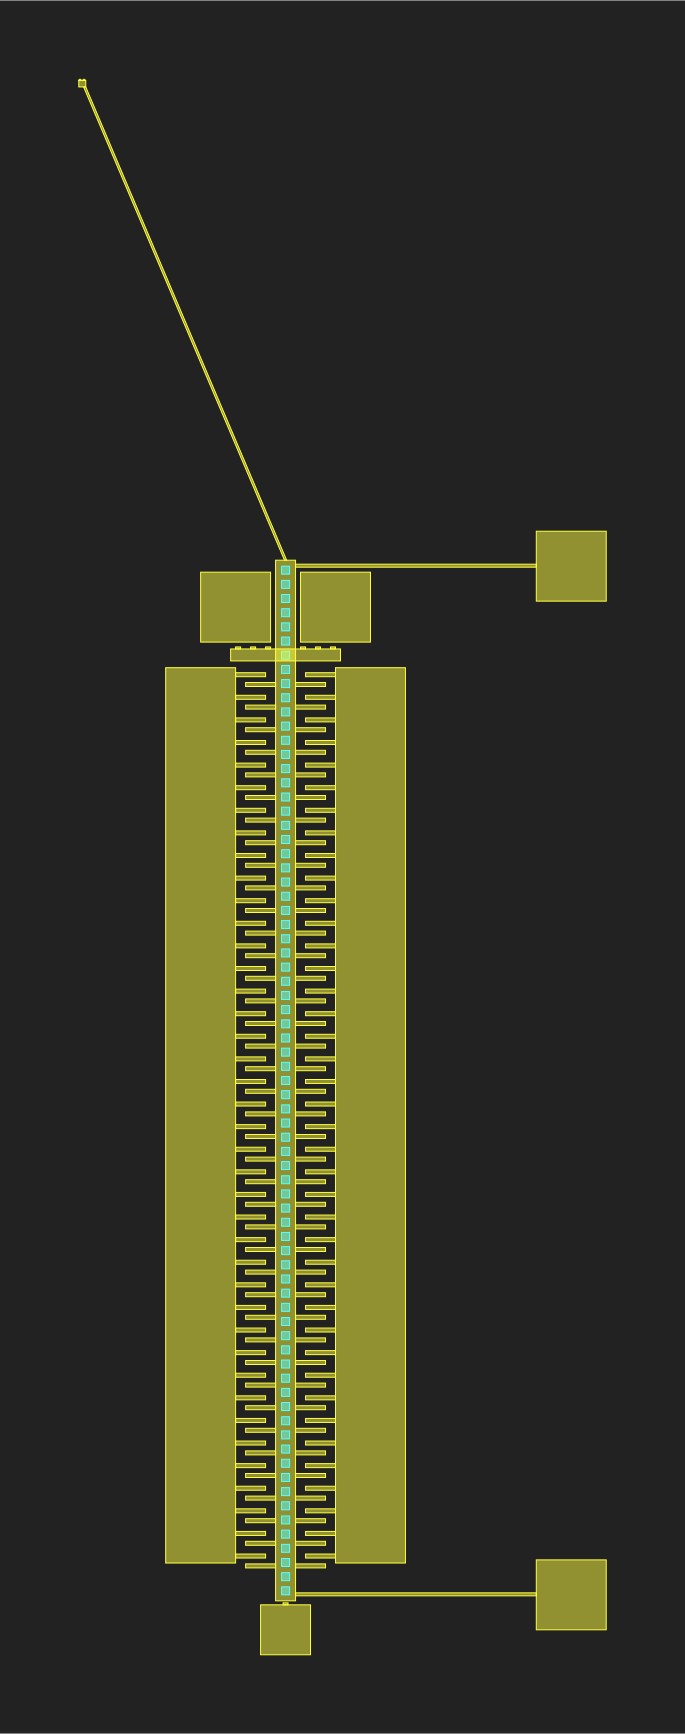

In [15]:
gca.write_svg(svgname, scaling = 1)
SVG(svgname)

## area comparison

In [16]:
# gca.area()
# # motor.L_anchor = gca.anchor_width
# # motor.L_sup = 2*gca.space
# # motor.L_frame = gca.bar_width/2
# bb = gca.get_bounding_box()
# (bb[1,0]-bb[0,0])*(bb[1,1]-bb[0,1]), motor.comp_my_area()*1e12/motor.num_act
# # motor.total_half_width, motor.total_length, motor.L_sup, motor.L_overlap, motor.L_frame
# # motor.total_half_width*2, (bb[1,0]-bb[0,0])
# # motor.total_length,bb[1,1]-bb[0,1]
# # motor.total_length*motor.total_half_width*2, motor.comp_my_area()
drawer.compare_total_area()

{'drawn_area': 832770.8901527113, 'input_area': 8.189543890296529e-07}

In [17]:
output_cell.add(gdspy.CellReference(gca))

Try with different motor objects

In [27]:
params = {
    'L_overlap': 85e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':6,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 40,
    'shuttle_extension': 100e-6,
    'shuttle_width': 20e-6,
    'etch_hole_size': 8e-6
}
mot2= analysis.InchwormSpeed(**params)


In [28]:
draw2 = generator.MotorDrawer(lib, mot2)
output_cell.add(gdspy.CellReference(draw2.drawn_gca, (2000,2000)))

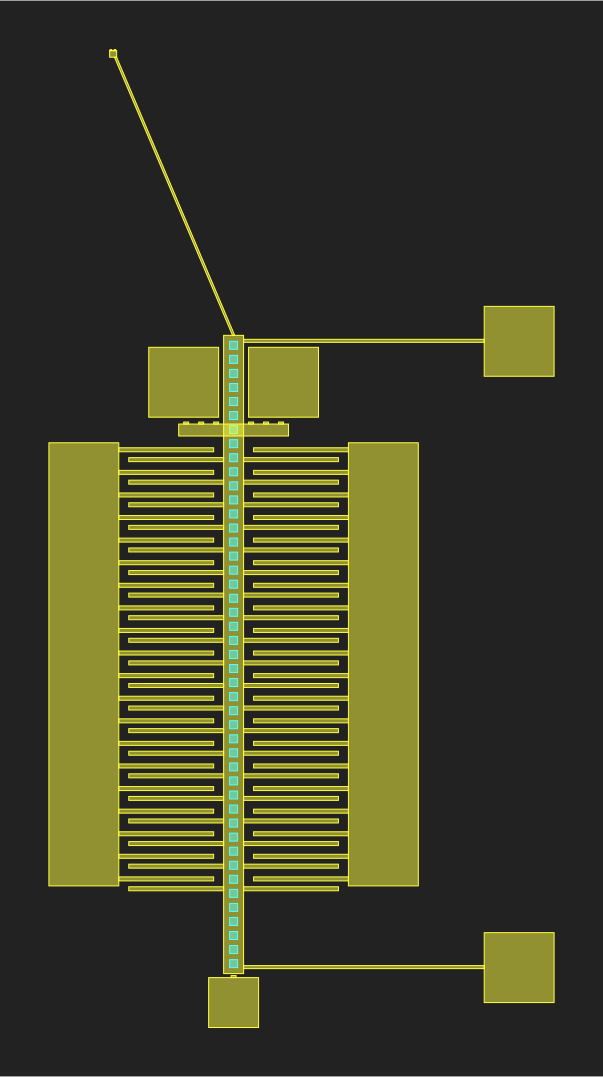

In [29]:
draw2.drawn_gca.write_svg(svgname, scaling = 1)
SVG(svgname)

In [21]:
draw2.compare_total_area()

{'drawn_area': 851845.5834972471, 'input_area': 8.474945149832428e-07}

In [22]:
draw2.compare_mass()

{'drawn_mass': 6.877736768690516e-09, 'input_mass': 6.806581843530902e-09}

In [23]:
lib.write_gds(filename)